# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Project 
## E-commerce EDA Analysis 

In [35]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\eCommercePK.csv")

# Data Info 

In [36]:
df.shape

(797, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      797 non-null    int64 
 1   order_status  797 non-null    object
 2   order_source  797 non-null    object
 3   order_date    797 non-null    object
 4   category      797 non-null    object
 5   sku           797 non-null    object
 6   quantity      797 non-null    int64 
 7   sales         797 non-null    int64 
 8   city          797 non-null    object
dtypes: int64(3), object(6)
memory usage: 56.2+ KB


In [38]:
df.head()

,order_id,order_status,order_source,order_date,category,sku,quantity,sales,city
0,5447,Shipped,Whatsapp,04/01/2025,CK,Dng,1,1590,Karachi
1,14127,Shipped,Web,08/01/2025,CK,DIY,1,899,Karachi
2,14213,Shipped,Web,19/01/2025,CK,DIY,1,899,Karachi
3,14333,Shipped,Web,05/02/2025,CK,Simply9,1,990,Karachi
4,14397,Shipped,Web,16/02/2025,CK,Simply9,1,990,Karachi


# Data Handling & Cleaning

In [39]:
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [40]:
df["order_date"]=pd.to_datetime(df["order_date"],dayfirst=True)

In [41]:
df["order_month"] = df["order_date"].dt.month
df["order_day"] = df["order_date"].dt.day
df["order_weekday"] = df["order_date"].dt.weekday
df["order_year"] = df["order_date"].dt.year


In [42]:
df.head()

,order_id,order_status,order_source,order_date,category,sku,quantity,sales,city,order_month,order_day,order_weekday,order_year
0,5447,Shipped,Whatsapp,2025-01-04,CK,Dng,1,1590,Karachi,1,4,5,2025
1,14127,Shipped,Web,2025-01-08,CK,DIY,1,899,Karachi,1,8,2,2025
2,14213,Shipped,Web,2025-01-19,CK,DIY,1,899,Karachi,1,19,6,2025
3,14333,Shipped,Web,2025-02-05,CK,Simply9,1,990,Karachi,2,5,2,2025
4,14397,Shipped,Web,2025-02-16,CK,Simply9,1,990,Karachi,2,16,6,2025


# EDA & Visualization

<Axes: xlabel='category', ylabel='city'>

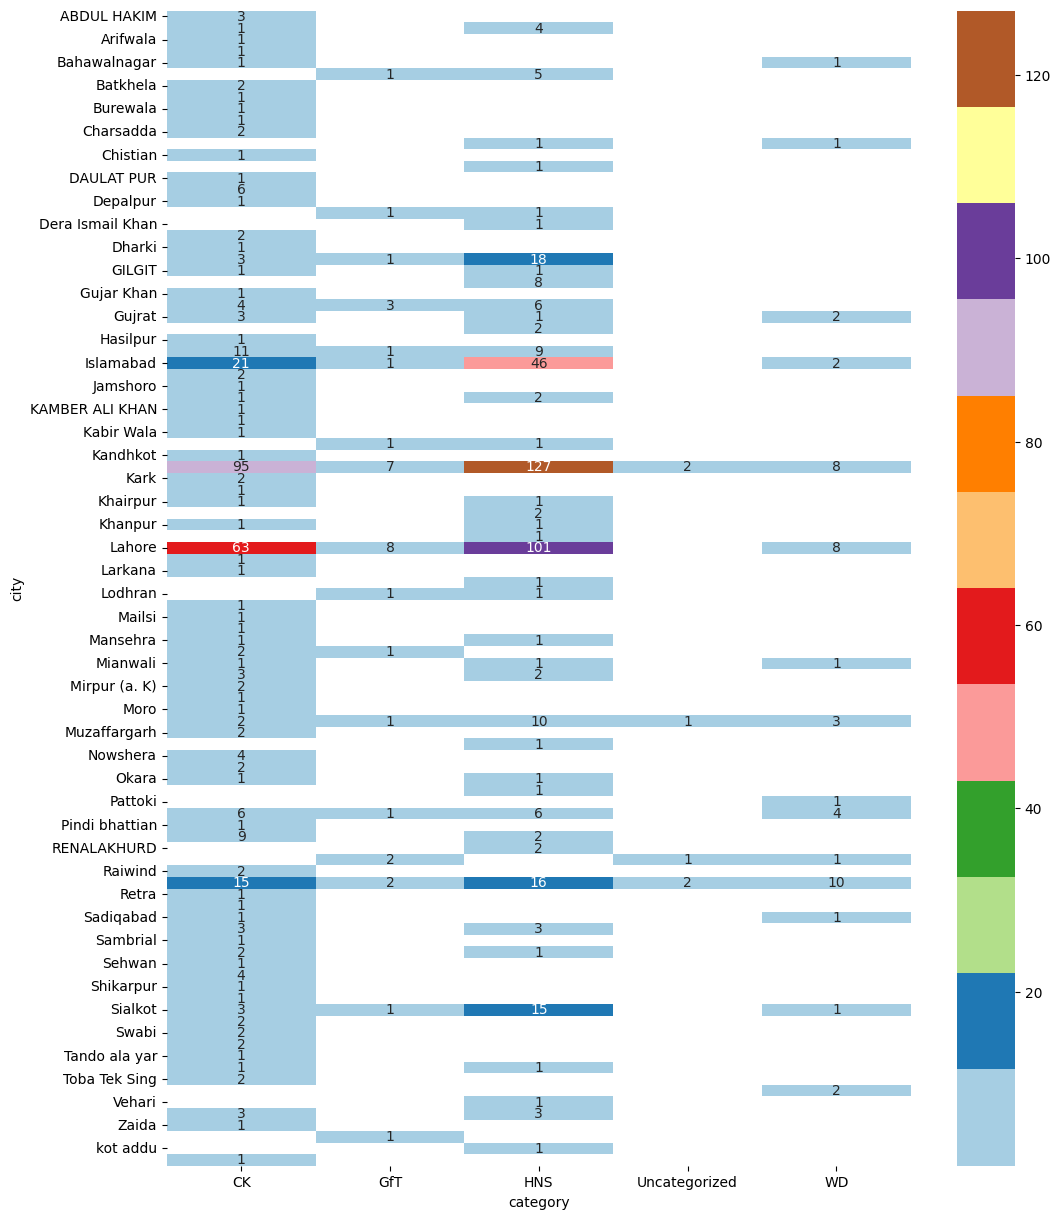

In [ ]:
pivot = df.pivot_table(index="city", columns="category", values="quantity", aggfunc="sum")
plt.figure(figsize=(12,15))
sns.heatmap(pivot, annot=True, fmt="g", cmap="Blues")


In [55]:
px.bar(df.groupby("category")["sales"].sum().reset_index(), x="category", y="sales", title="Sales by Category")
px.pie(df.groupby("city")["sales"].sum().reset_index(), names="city", values="sales", title="Sales Distribution by City")


In [72]:
fig = px.bar(df, x="city", y="sales", color="category", animation_frame="order_month",
             title="Monthly City Sales by Category")
fig.show()


In [71]:
fig = px.sunburst(df, path=["order_source", "order_status", "category"], values="sales",
                  title="Order Flow Sunburst")
fig.show()


In [70]:
fig = px.treemap(df, path=["category", "sku"], values="sales", title="Sales Distribution: Category → SKU")
fig.show()


In [69]:
bubble = df.groupby("city").agg({"sales":"sum", "quantity":"sum"}).reset_index()
bubble["avg_quantity"] = bubble["quantity"] / len(df)
fig = px.scatter(bubble, x="sales", y="quantity", size="avg_quantity", color="city",
                 title="Sales vs. Quantity by City", hover_name="city", size_max=60)
fig.show()


In [ ]:
import plotly.express as px
fig = px.line(df, x="sales", y="order_date", color="category", title="Sales Trends by Category")
fig.update_traces(mode="lines+markers")
fig.show()

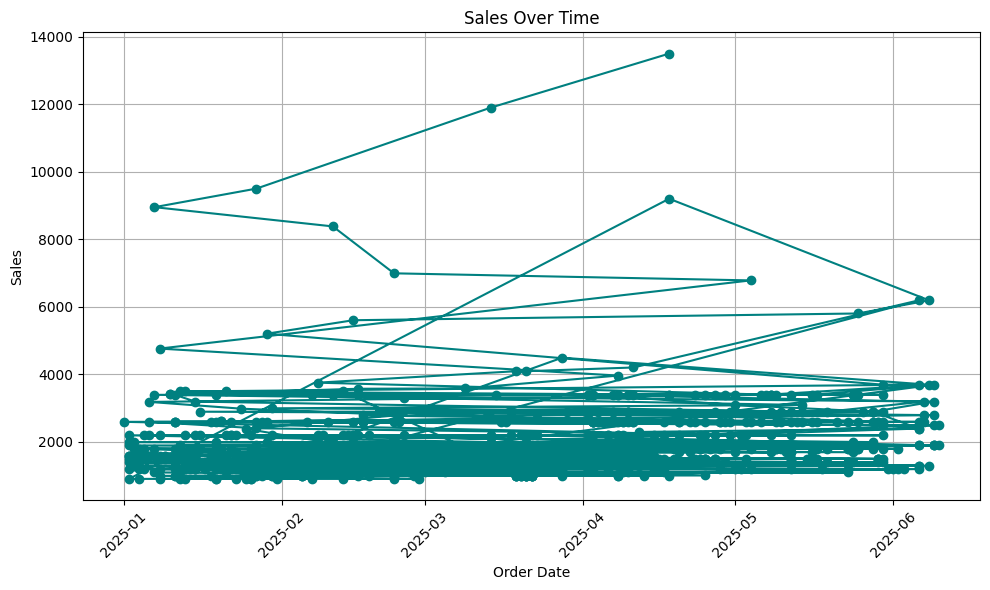

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df["order_date"], df["sales"], color="teal", marker='o', linestyle='-')
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
import plotly.express as px
pivot = df.pivot_table(index="city", columns="order_weekday_name", values="sales", aggfunc="sum")
fig = px.imshow(pivot, text_auto=True, color_continuous_scale="Viridis", title="Sales Heatmap by City & Weekday")
fig.show()
